In [1]:
def fib(n):
    if n==1 or n==2:
        return 1
    return fib(n-1)+fib(n-2)

In [2]:
get_ipython().magic(u'timeit fib(15)')

10000 loops, best of 3: 186 µs per loop


In [3]:
get_ipython().magic(u'timeit fib(20)')

100 loops, best of 3: 2.01 ms per loop


In [4]:
import math
def complex(a,b):
    module = math.sqrt(a*a+b*b)
    if (a!=0):
        arg = math.atan(b/a)
    else:
        arg = math.pi/2
    return module,arg

In [5]:
print complex(2,0)
print complex(0,1)

(2.0, 0.0)
(1.0, 1.5707963267948966)


In [6]:
def my_fun():
    '''
    >>> complex(2,0)
    (2.0, 0.0)
    >>> complex(0,1)
    (0.0, 1.5707963267948966)
    '''
    pass

import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 5, in __main__.my_fun
Failed example:
    complex(0,1)
Expected:
    (0.0, 1.5707963267948966)
Got:
    (1.0, 1.5707963267948966)
**********************************************************************
1 items had failures:
   1 of   2 in __main__.my_fun
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=2)

In [9]:
import math
class Complex(object):
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag
        
    def __get__(self):
        return self.real, self.imag

    def __add__(self, other):
        return Complex(self.real + other.real,
                       self.imag + other.imag)

    def __sub__(self, other):
        return Complex(self.real - other.real,
                       self.imag - other.imag)

    def __mul__(self, other):
        return Complex(self.real*other.real - self.imag*other.imag,
                       self.imag*other.real + self.real*other.imag)

    def __div__(self, other):
        sr, si, or1, oi = self.real, self.imag, other.real, other.imag # short forms
        r = float(or1**2 + oi**2)
        return Complex((sr*or1+si*oi)/r, (si*or1-sr*oi)/r)

    def __abs__(self):
        return math.sqrt(self.real**2 + self.imag**2)

    def __neg__(self):   # defines -c (c is Complex)
        return Complex(-self.real, -self.imag)

    def __eq__(self, other):
        return self.real == other.real and self.imag == other.imag

    def __ne__(self, other):
        return not self.__eq__(other)

    def __str__(self):
        return '(%g, %g)' % (self.real, self.imag)

    def __repr__(self):
        return 'Complex' + str(self)

    def __pow__(self, power):
        raise NotImplementedError('self**power is not yet impl. for Complex')

In [10]:
i=Complex(0,1)
print i.__get__()
print i.__abs__()

(0, 1)
1.0


In [11]:
def memoized(f):
    memory = {}
    def wrapper(*args, **kwargs):
        key = (tuple(args), hash(tuple(sorted(kwargs.items()))))
        if not key in memory:
            memory[key] = f(*args, **kwargs)
        return memory[key]
    return wrapper

In [12]:
@memoized
def fib(n):
    if n==1 or n==2:
        return 1
    return fib(n-1)+fib(n-2)

In [13]:
>>> fib(3)
fib (3)
fib(2)
fib(1)

1

In [14]:
fib(7)
fib(7)
fib(6)
fib(5)
fib(4)

3

In [15]:
fib(6)

8

Результат запоминается и возвращается при повторном запросе

In [16]:
def benchmark(f):
    import time
    def wrapper(*args, **kwargs):
        t = time.clock()
        res = f(*args, **kwargs)
        print f.__name__, time.clock()-t
        return res
    return wrapper

In [17]:
@memoized
@benchmark
def fib(n):
    if n==1 or n==2:
        return 1
    return fib(n-1)+fib(n-2)

In [18]:
fib(7)
fib(7)
fib(6)
fib(5)
fib(4)

fib 0.000214292136008
fib 4.31047400014e-05
fib 0.00103410323872
fib 0.0011851750894
fib 0.0013243418214
fib 0.00144010883743
fib 0.00155669689609


3

# 2 Requests/urllib + BeautifulSoup

In [19]:
url = "https://lenta.ru/news/2017/05/16/yandex_vk/"

In [20]:
import requests

text = requests.get(url).text

In [21]:
from bs4 import BeautifulSoup

In [22]:
bs4_object = BeautifulSoup(text)

C:\Users\Mika\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\Mika\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [23]:
print bs4_object.find(itemprop="articleBody").text

На Украине закроют доступ к социальным сетям «ВКонтакте» и «Одноклассники», а также к сервисам компании «Яндекс». Такая мера предусмотрена указом о новых санкциях в отношении России, которые подписал во вторник, 16 мая, украинский лидер Петр Порошенко. Текст документа опубликован на официальном сайте президента Украины.Отмечается, что заблокируют все сервисы «Яндекса».Доступ к соцсетям закроют в рамках ограничений, наложенных на Mail.Ru Group. Mail.ru жители Украины тоже не смогут воспользоваться.Материалы по теме12:52 Сегодня«"ВКонтакте" для русских»Как украинцы отреагировали на запрет российских социальных сетейТакже под санкции попали сайты антивирусных компаний «Лаборатория Касперского» и DrWeb.Кроме того, в документе говорится об ограничениях на вещание, а также о блокировании активов российских телекомпаний «ТВ Центр», РБК, ВГТРК, «Звезда», «НТВ-Плюс», ТНТ, ОТР и РЕН ТВ.Санкции введены в действие сроком на три года.Ограничения введены в рамках вступления в силу решения Совета нац

# 3 Numpy

In [24]:
import numpy as np
np.random.seed(29)
d = np.random.randint(0, 5, size=(3,4,2))
d

array([[[3, 4],
        [2, 0],
        [0, 1],
        [1, 0]],

       [[3, 1],
        [0, 1],
        [3, 3],
        [4, 0]],

       [[4, 2],
        [2, 3],
        [0, 2],
        [3, 0]]])

In [25]:
d[:, 0]

array([[3, 4],
       [3, 1],
       [4, 2]])

In [26]:
d[1:2, 1:3]

array([[[0, 1],
        [3, 3]]])

In [27]:
d[:, 1]

array([[2, 0],
       [0, 1],
       [2, 3]])

In [28]:
d[0, :]

array([[3, 4],
       [2, 0],
       [0, 1],
       [1, 0]])

In [29]:
import timeit, math, array
from functools import partial
import numpy as np

def f1(x):
    for i in range(1,len(x)):
        x[i] = x[i-1] + 1

def f2(x):
    for i in range(0,len(x)):
        x[i] = math.cos(i)

L = int(1e6)

print('np 1: {:.5f} s'.format(timeit.timeit(partial(f1, np.array([0] * L)), number=20)))
print('np 2: {:.5f} s'.format(timeit.timeit(partial(f2, np.array([0] * L)), number=20)))

print('list 1: {:.5f} s'.format(timeit.timeit(partial(f1, [0] * L), number=20)))
print('list 2: {:.5f} s'.format(timeit.timeit(partial(f2, [0] * L), number=20)))

print('array 1: {:.5f} s'.format(timeit.timeit(partial(f1, array.array("f", [0] * L)), number=20)))
print('array 2: {:.5f} s'.format(timeit.timeit(partial(f2, array.array("f", [0] * L)), number=20)))

np 1: 8.52436 s
np 2: 9.41255 s
list 1: 2.61260 s
list 2: 5.50406 s
array 1: 4.37932 s
array 2: 6.86578 s


In [30]:
def linspace(a,b,n):
    lis = []
    if n==1:
        lis.append(b)
    d=(b-a)/(n-1)
    for i in range(n):
        lis.append(a+d*i)
    return lis
L = int(1e5)
b = np.linspace(2.0, 3.0, num=5)
a = linspace(2.0, 3.0, 5)
get_ipython().magic(u'timeit linspace(2.0, 3.0, L)')
get_ipython().magic(u'timeit np.linspace(2.0, 3.0, L)')

100 loops, best of 3: 18 ms per loop
1000 loops, best of 3: 228 µs per loop


In [31]:
a

[2.0, 2.25, 2.5, 2.75, 3.0]

# 4 Matplotlib

 Для того, чтобы график строился не в отдельном окне, а прямо в тексте есть команда %matplotlib inline 

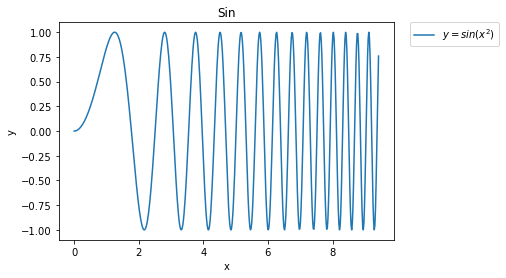

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(0, 3*np.pi, 500)
fig = plt.figure()
plt.plot(x, np.sin(x**2),label="$y=sin(x^2)$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Sin")
plt.ylabel('y')
plt.xlabel('x')
fig.savefig('temp.png')

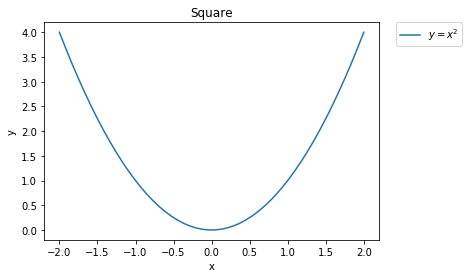

In [33]:
fig = plt.figure()
plt.plot(np.linspace(-2, 2), [z ** 2 for z in  np.linspace(-2, 2)], label ="$y=x^2$")
plt.title("Square")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
fig.savefig('temp.png')

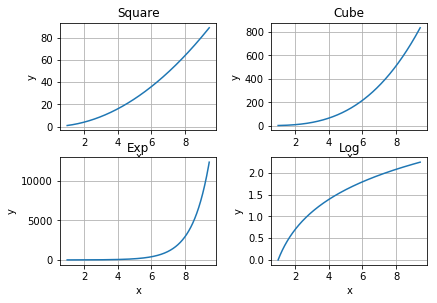

In [34]:
x = np.linspace(1, 3*np.pi, 500)
plt.subplot(221)
plt.plot(x,x*x)
plt.title("Square")
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(222)
plt.plot(x,x*x*x)
plt.title("Cube")
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(223)
plt.plot(x,np.exp(x))
plt.title("Exp")
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(224)
plt.plot(x,np.log(x))
plt.title("Log")
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


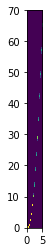

In [35]:
def f(x,y):
    return 3*x*y + x - 2*y

x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)
heatmap, xedges, yedges = np.histogram2d(x, f(x,y), bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

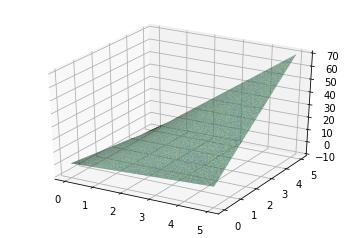

In [1]:
def f(x,y):
    return 3*x*y + x - 2*y
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)



fig = plt.figure()
ax = fig.gca(projection='3d')


X, Y = np.meshgrid(x, y)
Z = f(X,Y)

data_value = np.random.rand(len(y), len(x))
colors = cm.ScalarMappable(cmap = "viridis").to_rgba(data_value)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
                       linewidth=0, antialiased=True)

plt.show()

In [1]:
import numpy as np 

L = 10 #количество точек в выборке

x= np.linspace(-5,5,L)



In [2]:
def true_poly(x):
    return x**3 +2*x**2-3*x+2

y = true_poly(x)

In [3]:
import matplotlib.pylab as plt 
%matplotlib inline

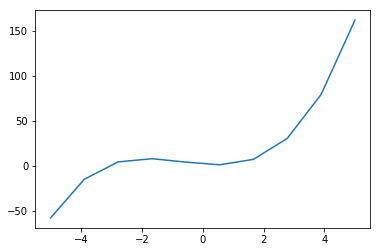

In [4]:
y_with_noise = y + 0*np.random.randn(L)
plt.plot(x,y_with_noise)

In [5]:
def poly(x, coefs):
    return sum([coefs[k]*x**k for k in range(len(coefs))])

In [6]:
C = 0.5
def loss(coefs):
    loss = 0.0
    loss +=sum((poly(x,coefs)-y_with_noise)**2)
    loss += C*sum(coefs**2)
    return loss

In [7]:
from scipy.optimize import minimize

result = minimize(loss, np.array([0.001]*12))

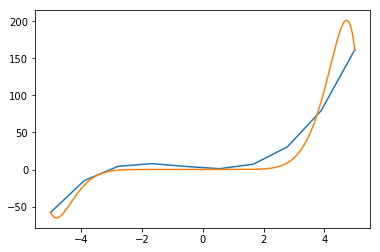

In [8]:
plt.plot(x,y_with_noise)
t =np.linspace(-5,5,500)
plt.plot(t,poly(t,result.x))
plt.show()

# Pandas 

In [30]:
import pandas as pd
dataset_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt"
df= pd.read_table(dataset_path, names = ['a','b','c','target'])
len(df)

245057

In [40]:
df.head(4)

,a,b,c,target
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1


In [41]:
data = {'a' : [74,73,72,70], 'b' : [85,84,83,81],'c' : [123,122,121,119]}
temp = pd.DataFrame(data=data,index=['foo','bar','boo','kar'])
temp

,a,b,c
foo,74,85,123
bar,73,84,122
boo,72,83,121
kar,70,81,119


In [42]:
temp['a']

foo    74
bar    73
boo    72
kar    70
Name: a, dtype: int64

In [44]:
temp.loc['bar':'kar'] #labeled-based

,a,b,c
bar,73,84,122
boo,72,83,121
kar,70,81,119


In [45]:
temp.ix[1:3]

,a,b,c
bar,73,84,122
boo,72,83,121


In [46]:
df2 = pd.DataFrame(data=data,index=[1,2,3,4])
df2

,a,b,c
1,74,85,123
2,73,84,122
3,72,83,121
4,70,81,119


In [47]:
df2.ix[1:3] #index-based

,a,b,c
1,74,85,123
2,73,84,122
3,72,83,121


In [57]:
df = df.assign(a1=df['a']*df['b'])
df = df.assign(b1=df['b']*df['c'])
df = df.assign(c1=df['c']*df['a'])
df = df.assign(a1=df['a']*df['b'])
df = df.assign(a2=np.abs(df['a']-df['b']))
df = df.assign(b2=np.abs(df['b']-df['c']))
df = df.assign(c2=np.abs(df['c']-df['a']))

In [58]:
df.head(4)

,a,b,c,target,a1,b1,c1,a2,b2,c2
0,74,85,123,1,6290,10455,9102,11,38,49
1,73,84,122,1,6132,10248,8906,11,38,49
2,72,83,121,1,5976,10043,8712,11,38,49
3,70,81,119,1,5670,9639,8330,11,38,49


In [65]:
X = df[['a','b','c']]
y = df['target']
import numpy as np

np.random.seed(0)
indices = np.random.permutation(len(X))
X = np.array(X)
y = np.array(y)
test_size = 100000
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]
y_test  = y[indices[-test_size:]]

In [66]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [78]:
predicted = model.predict(X_test)
print 'KNeighbours:',float(sum(y_test == predicted))/test_size

KNeighbours: 0.99948


In [69]:
Xm = df[['a1','b1','c1','a2','b2','c2']]
ym = df['target']
import numpy as np

np.random.seed(0)
indicesm = np.random.permutation(len(Xm))
Xm = np.array(Xm)
ym = np.array(ym)
test_sizem = 100000
X_trainm = Xm[indices[:-test_sizem]]
y_trainm = ym[indices[:-test_sizem]]
X_testm  = Xm[indices[-test_sizem:]]
y_testm  = ym[indices[-test_sizem:]]

In [70]:
modelm = KNeighborsClassifier()
modelm.fit(X_trainm, y_trainm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
predictedm = modelm.predict(X_testm)
print 'KNeighbours modified:', float(sum(y_testm == predictedm))/test_sizem

KNeighbours modified: 0.99923


In [77]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X_train, y_train)
predictLog = logreg.predict(X_test)
print 'Log:', float(sum(y_test == predictLog))/test_size

Log: 0.91786


In [80]:
logreg.fit(X_trainm, y_trainm)
predictLogm = logreg.predict(X_testm)
print 'Log modified:',float(sum(y_test == predictLogm))/test_sizem


Log modified: 0.98797


In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictRfc = rfc.predict(X_test)
print 'Random forest:', float(sum(y_test == predictRfc))/test_size

Random forest: 0.99948


In [82]:
rfc.fit(X_trainm, y_trainm)
predictRfcm = rfc.predict(X_testm)
print 'Random forest modified:', float(sum(y_test == predictRfcm))/test_sizem

Random forest modified: 0.99953
